In [20]:
import numpy as py
import torch
from torch.utils import data
from d2l import torch as d2l



# 1 dataset
根据带有噪声的线性模型构造一个人造数据集。 我们使用线性模型参数w=[2,−3.4]⊤、b=4.2和噪声项ϵ生成数据集及其标签：
y=Xw+b+ϵ

In [21]:
def synthetic_data(w, b, num_examples):  
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))#normal distribution ,mean=0,variance =0
    y = torch.matmul(X, w) + b #matirx multiple
    y += torch.normal(0, 0.01, y.shape)#noise
    return X, y.reshape((-1, 1))#-1表示让pytorch自己推导

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

# 2 visualize dataset
features 中的每一行都包含一个二维数据样本，labels 中的每一行都包含一维标签值（一个标量）

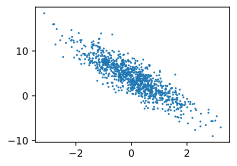

In [22]:
d2l.set_figsize()
#有些低版本的pytorch，需要将数据从计算图，抛离出来才能转到numpy里面
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

# 3 dataloader
定义一个data_iter 函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [23]:

# 利用pytorch的工具dataset 和 dataloader
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.2515, -0.7660],
         [-0.3107,  1.4886],
         [-1.2209, -1.2723],
         [-0.0789, -1.0658],
         [-1.3439,  0.2707],
         [ 0.0550,  0.7796],
         [-0.9880, -0.6188],
         [ 0.2341, -0.8550],
         [-1.3762,  0.2808],
         [ 0.2699, -0.0815]]),
 tensor([[ 6.3078],
         [-1.4691],
         [ 6.0971],
         [ 7.6592],
         [ 0.5955],
         [ 1.6662],
         [ 4.3337],
         [ 7.5785],
         [ 0.5123],
         [ 5.0274]])]

# 4 Model

In [24]:
from torch import nn
#Linear 全连接层，线性层
#nn 是neuron network的简写
net = nn.Sequential(nn.Linear(2,1))

## 4.2 params init

In [25]:

#net[0]指第一层所需要的参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 4.3 MSELoss

In [26]:
loss = nn.MSELoss()

# 5 Optimizer

In [27]:
# 这里的params是w和b
optimizer = torch.optim.SGD(net.parameters(),lr=0.03)


# 6 Start Training

In [28]:
num_epochs = 3
for epoch in range(num_epochs):
    for X,y in data_iter:
        #MSELoss
        l = loss(net(X),y)
        # cal gradient
        l.backward()
        # update params
        optimizer.step()
        # clear last gradient
        optimizer.zero_grad()
    avg_l = loss(net(features),labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000415
epoch 2, loss 0.000152
epoch 3, loss 0.000076


比较生成数据集的真实参数和通过有限数据训练获得的模型参

In [29]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0005,  0.0004])
b的估计误差： tensor([-0.0002])
